# Importance sampling

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from vmc.interface import PyHarmonicOscillator, PyMetropolisAlgorithm, \
    PySimpleGaussian, PySampler, PyImportanceMetropolis
from vmc import run_experiment

from IPython.core.pylabtools import figsize
from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0
diffusion_coefficient = 0.5

step_length = 2.0
time_step = 0.5

In [4]:
alpha_min = 0.1
alpha_max = 0.9
num_alphas = 17

parameter_names = ["alpha"]

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

In [5]:
num_particles = 10
num_dimensions = 3
num_samples = int(1e5)

num_thermalization_steps = 0

kwargs = {
    "num_samples": num_samples, "step_length": step_length,
    "num_thermalization_steps": num_thermalization_steps
}

In [6]:
wavefunction_importance = PySimpleGaussian(
    num_particles, num_dimensions, mass, omega, spread=step_length)
sampler_importance = PySampler(
    wavefunction_importance, PyHarmonicOscillator(),
    PyImportanceMetropolis(time_step, diffusion_coefficient))

In [7]:
df_importance = run_experiment(
    sampler_importance, wavefunction_importance, alphas,
    parameter_names, **kwargs)

100%|██████████| 17/17 [00:00<00:00, 17.17it/s]


In [8]:
wavefunction = PySimpleGaussian(
    num_particles, num_dimensions, mass, omega, spread=step_length)
sampler = PySampler(
    wavefunction, PyHarmonicOscillator(),
    PyMetropolisAlgorithm())

In [9]:
df = run_experiment(
    sampler, wavefunction, alphas,
    parameter_names, **kwargs)

100%|██████████| 17/17 [00:00<00:00, 33.77it/s]


In [10]:
display(df_importance)

,alpha,energy,variance,acceptance
0,0.10,39.006073,84.193585,0.98624
1,0.15,27.312300,33.468363,0.97486
2,0.20,21.681833,15.999902,0.96007
3,0.25,18.851310,8.529775,0.94431
4,0.30,17.035867,4.223166,0.92571
5,0.35,15.970687,1.936703,0.90811
6,0.40,15.363012,0.738618,0.88693
7,0.45,15.096167,0.172260,0.86610
8,0.50,15.000000,0.000000,0.84326
9,0.55,15.069014,0.140493,0.81855


In [11]:
display(df)

,alpha,energy,variance,acceptance
0,0.10,38.664703,82.876745,0.55187
1,0.15,27.117352,35.370782,0.46607
2,0.20,21.890467,17.438894,0.40596
3,0.25,18.683476,8.665071,0.35396
4,0.30,16.948329,3.930849,0.31470
5,0.35,15.895134,2.078105,0.28081
6,0.40,15.326953,0.711532,0.25120
7,0.45,15.068974,0.166125,0.22636
8,0.50,15.000000,0.000000,0.20739
9,0.55,15.050113,0.145721,0.19004


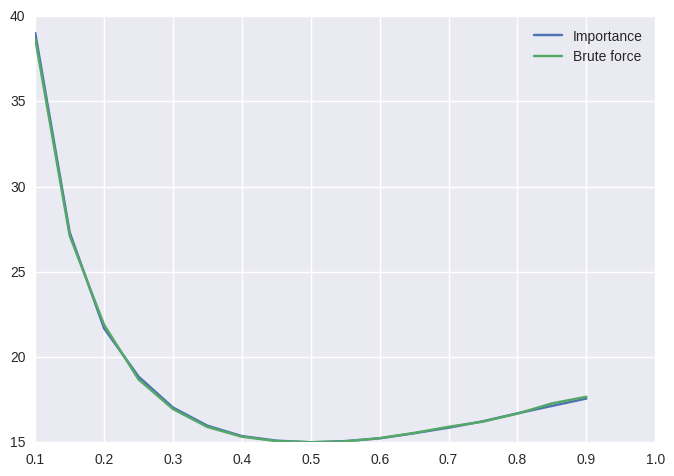

In [12]:
plt.plot(
    df_importance["alpha"], df_importance["energy"],
    label="Importance"
)
plt.plot(
    df["alpha"], df["energy"],
    label="Brute force"
)
plt.legend(loc="best")
plt.show()